# Predicting Stock Prices Using Regression on Moving Averages

In [2]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
warnings.filterwarnings('ignore')

## Simple Moving Average (SMA) - Meta

In [3]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('META.csv')
meta_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800


In [4]:
# Create 20 days simple moving average column
# meta_df['20_SMA'] = meta_df['Adj Close'].rolling(window = 20, min_periods = 1).mean()
# convert Date column to datetime
meta_df['Date'] = pd.to_datetime(meta_df['Date'], format = '%Y-%m-%d')
# sort by datetime
meta_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
meta_df['50_SMA'] = meta_df['Close'].rolling(window = 50, min_periods = 1).mean()
meta_df.dropna()
meta_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA
0,2022-04-18,210.000000,213.380005,208.300003,210.770004,210.546616,16580800,210.770004
1,2022-04-19,210.520004,218.429993,209.000000,217.309998,217.079666,20089900,214.040001
2,2022-04-20,213.610001,214.160004,198.919998,200.419998,200.207581,43036500,209.500000
3,2022-04-21,201.600006,202.970001,185.580002,188.070007,187.870667,49954100,204.142502
4,2022-04-22,190.369995,192.720001,183.270004,184.110001,183.914871,36426800,200.136002


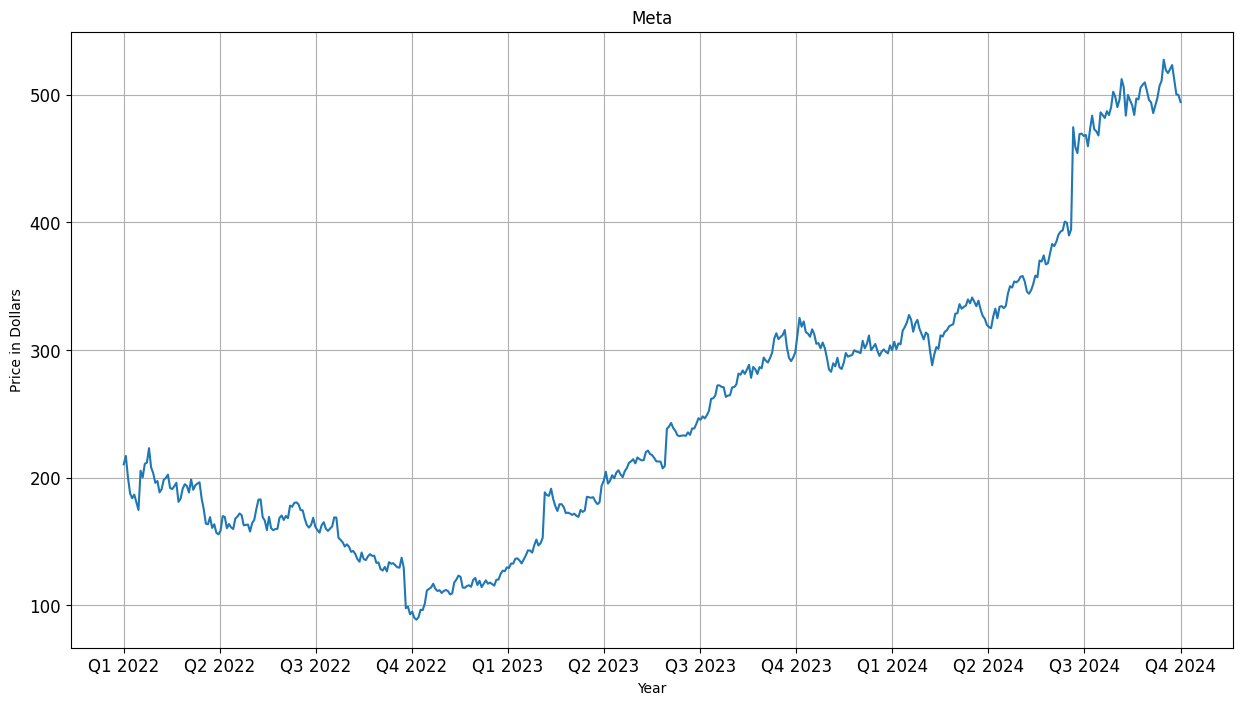

In [16]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (meta_df['Date'].dt.year.max() - meta_df['Date'].dt.year.min() + 1) * 4

meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('Meta')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(meta_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(meta_df['Date'].dt.year.min(), meta_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.show()

In [6]:
# # train test split
# test_size = 0.2
# training_size = 1 - test_size

# test_num = int(test_size * len(meta_df))
# train_num = int(training_size * len(meta_df))

# train = meta_df[:train_num][['Date', 'Adj Close', '50_SMA']]
# test = meta_df[train_num:][['Date', 'Adj Close', '50_SMA']]

# test.head()

# lr = LinearRegression()
# lr.fit(train[['Adj Close']], train['50_SMA'])
# y_pred = lr.predict(test[['Date', 'Adj Close']])

Model Coefficients: [[1.06666437]]
Mean Absolute Error: 28.58717997827785
Coefficient of Determination: 0.7102370325097322


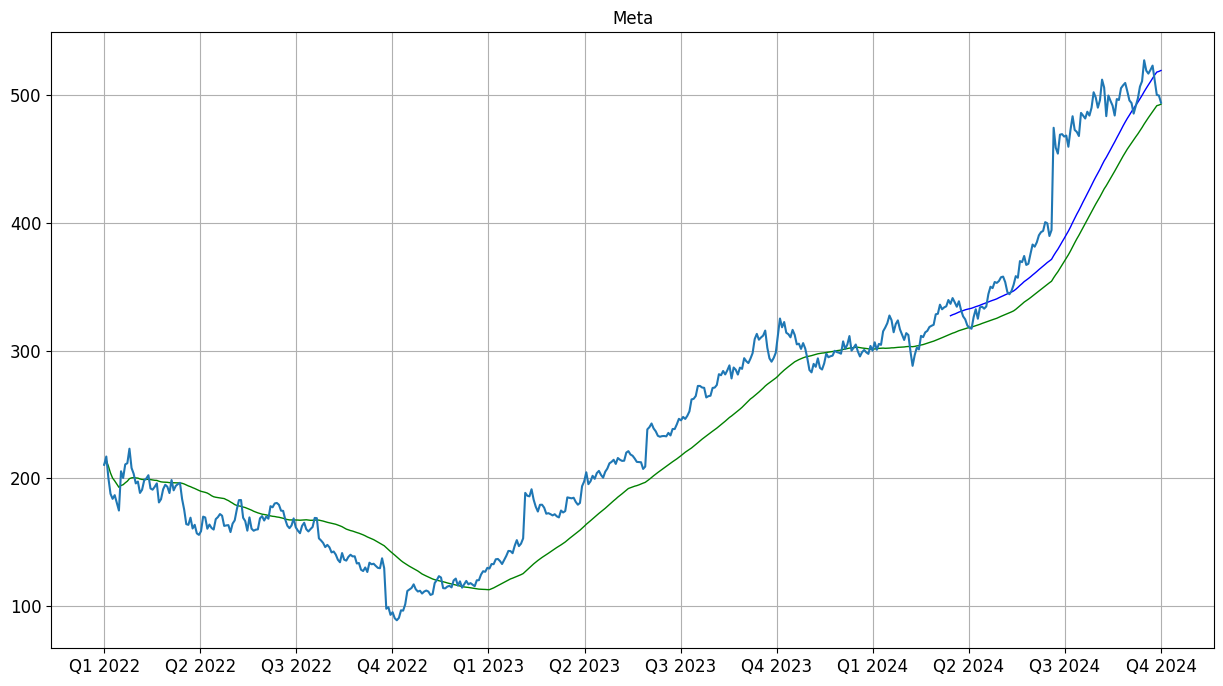

In [20]:
X_train, X_test, y_train, y_test = train_test_split(meta_df[['50_SMA']], meta_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.figure(figsize = (20, 10))
meta_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.title('Meta')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(meta_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(meta_df['Date'].dt.year.min(), meta_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.grid()
plt.show()

## Microsoft

In [10]:
# import the closing price data of Microsoft stock for the period of 2 years -

msft_df = pd.read_csv('MSFT.csv')
msft_df.head()

# convert Date column to datetime
msft_df['Date'] = pd.to_datetime(msft_df['Date'], format = '%Y-%m-%d')
# sort by datetime
msft_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
msft_df['50_SMA'] = msft_df['Close'].rolling(window = 50, min_periods = 1).mean()
msft_df.dropna()
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA
0,2022-04-18,278.910004,282.459991,278.339996,280.519989,275.533356,20778000,280.519989
1,2022-04-19,279.380005,286.170013,278.410004,285.299988,280.228363,22297700,282.909988
2,2022-04-20,289.399994,289.700012,285.369995,286.359985,281.269531,22906700,284.059987
3,2022-04-21,288.579987,293.299988,280.059998,280.809998,275.818207,29454600,283.247490
4,2022-04-22,281.679993,283.200012,273.380005,274.029999,269.158722,29405800,281.403992


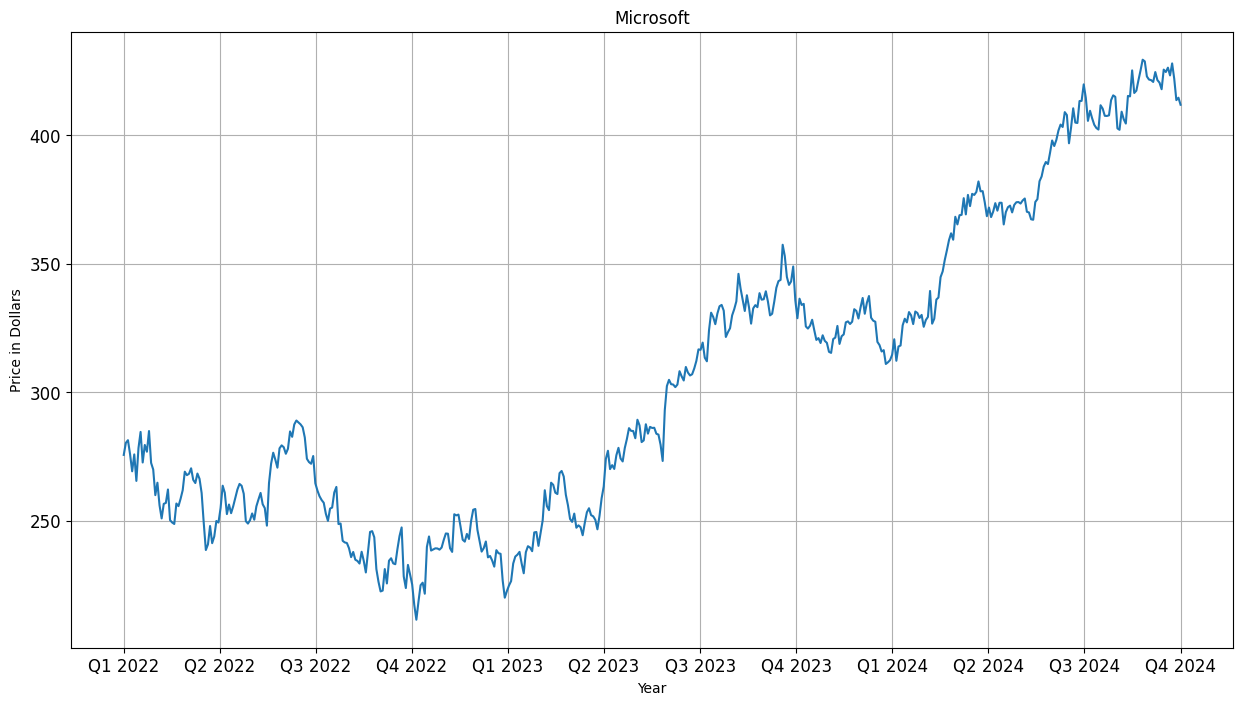

In [21]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (msft_df['Date'].dt.year.max() - msft_df['Date'].dt.year.min() + 1) * 4

msft_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('Microsoft')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(msft_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(msft_df['Date'].dt.year.min(), msft_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.show()

Model Coefficients: [[1.07546865]]
Mean Absolute Error: 10.097873347030971
Coefficient of Determination: 0.5835442848530246


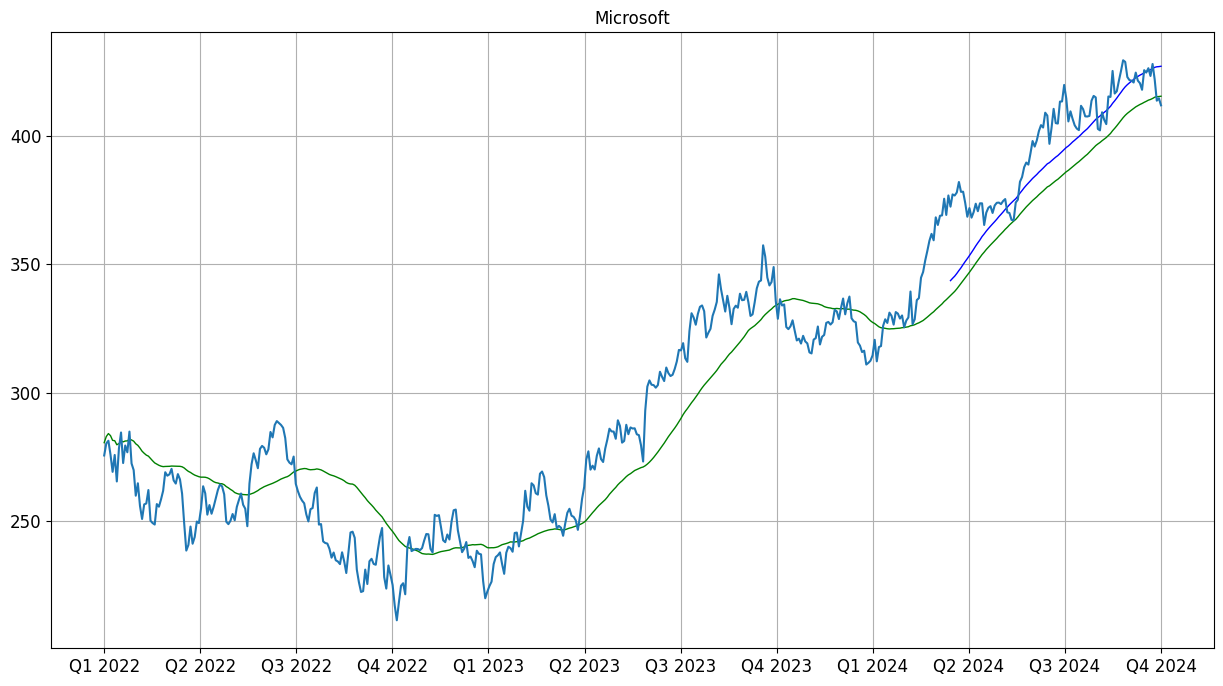

In [22]:
X_train, X_test, y_train, y_test = train_test_split(msft_df[['50_SMA']], msft_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.figure(figsize = (20, 10))
msft_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
msft_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(msft_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(msft_df['Date'].dt.year.min(), msft_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
plt.title('Microsoft')
plt.grid()
plt.show()

## NVidia

In [13]:
# import the closing price data of NVidia stock for the period of 2 years -

nvda_df = pd.read_csv('NVDA.csv')
nvda_df.head()

# convert Date column to datetime
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'], format = '%Y-%m-%d')
# sort by datetime
nvda_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
nvda_df['50_SMA'] = nvda_df['Close'].rolling(window = 50, min_periods = 1).mean()
nvda_df.dropna()
nvda_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_SMA
0,2022-04-18,212.000000,220.880005,210.789993,217.830002,217.556839,52570100,217.830002
1,2022-04-19,217.199997,223.729996,213.139999,221.979996,221.701614,51278100,219.904999
2,2022-04-20,225.169998,226.699997,212.000000,214.820007,214.550644,46897400,218.210002
3,2022-04-21,217.089996,223.919998,200.000000,201.830002,201.576920,65620900,214.115002
4,2022-04-22,203.029999,204.860001,195.000000,195.149994,194.905289,62471300,210.322000


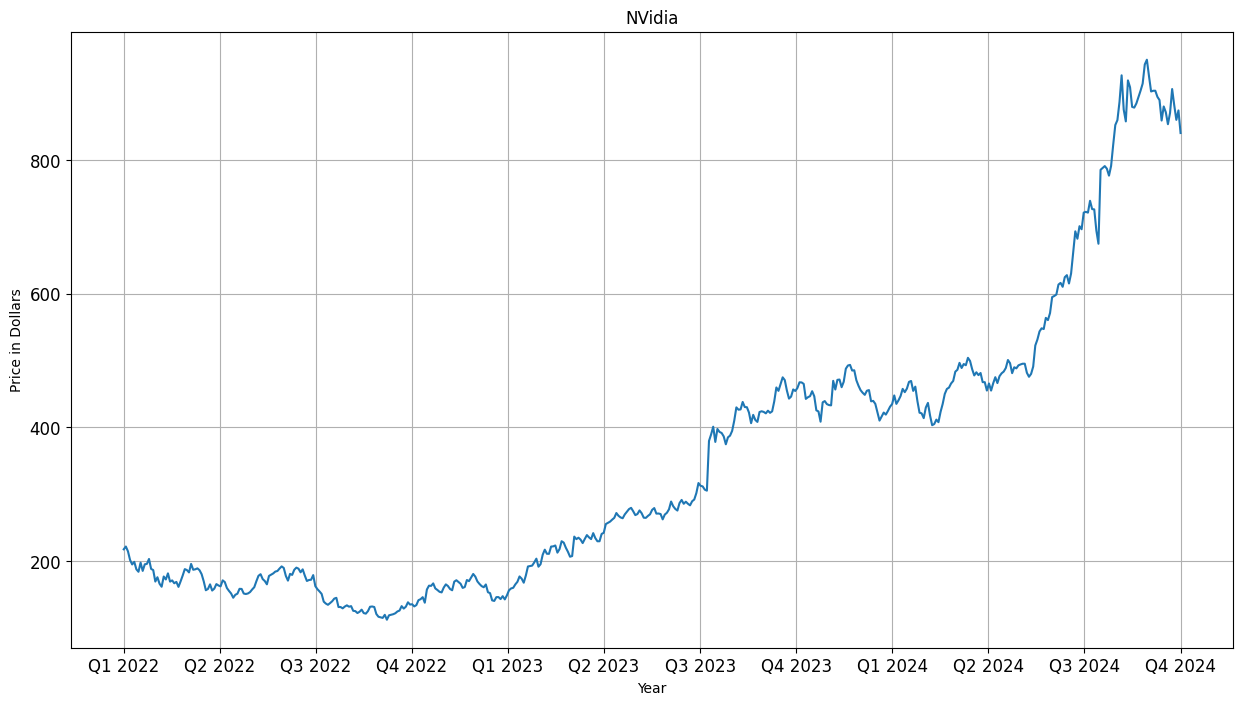

In [23]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (nvda_df['Date'].dt.year.max() - nvda_df['Date'].dt.year.min() + 1) * 4

nvda_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('NVidia')
# Customize x-axis ticks
plt.xticks(np.linspace(0, len(nvda_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(nvda_df['Date'].dt.year.min(), nvda_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.show()

Model Coefficients: [[1.0615389]]
Mean Absolute Error: 72.59552409925624
Coefficient of Determination: 0.6820186532676061


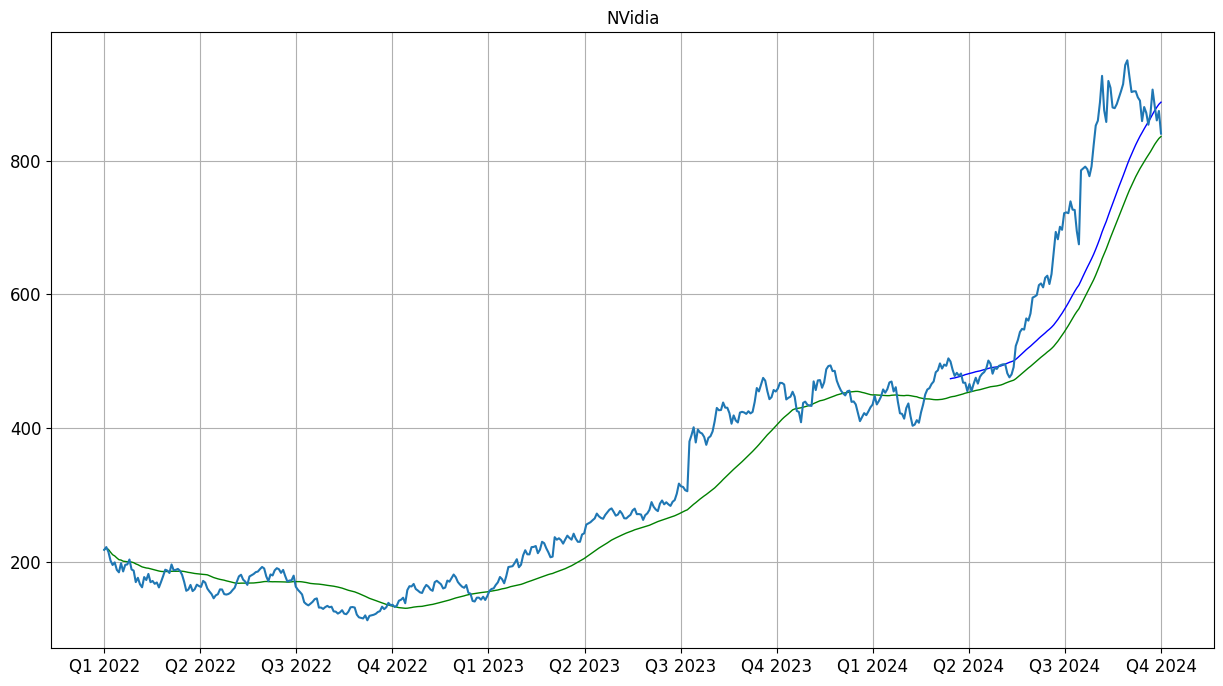

In [24]:
X_train, X_test, y_train, y_test = train_test_split(nvda_df[['50_SMA']], nvda_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

plt.figure(figsize = (20, 10))
nvda_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
nvda_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(nvda_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(nvda_df['Date'].dt.year.min(), nvda_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
plt.title('NVidia')
plt.grid()
plt.show()